2023-01-24 <br/>
Alone data <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-01-24/readme.md

Survival Analysis - Completed 

https://www.crosstab.io/articles/survival-plots/

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-24/survivalists.csv")

In [22]:
df.head()

,season,name,age,gender,city,state,country,result,days_lasted,medically_evacuated,reason_tapped_out,reason_category,team,day_linked_up,profession,url
0,1,Alan Kay,40,Male,Blairsville,Georgia,United States,1,56,False,NaN,NaN,NaN,NaN,Corrections Officer,alan-kay
1,1,Sam Larson,22,Male,Lincoln,Nebraska,United States,2,55,False,Lost the mind game,Family / personal,NaN,NaN,Outdoor Gear Retailer,sam-larson
2,1,Mitch Mitchell,34,Male,Bellingham,Massachusetts,United States,3,43,False,Realized he should actually be around for his ...,Family / personal,NaN,NaN,Butcher,mitch-mitchell
3,1,Lucas Miller,32,Male,Quasqueton,Iowa,United States,4,39,False,Felt content with what he had done,Family / personal,NaN,NaN,Survivalist and Wildlife Therapist/Natural Hea...,lucas-miller
4,1,Dustin Feher,37,Male,Pittsburgh,Pennsylvania,United States,5,8,False,Fear of storm,Family / personal,NaN,NaN,Carpenter,dustin-feher


In [62]:
df.season.nunique()

9

<AxesSubplot:xlabel='timeline'>

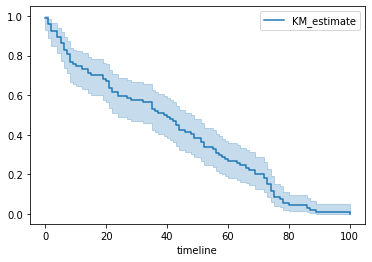

In [165]:
from lifelines import KaplanMeierFitter

# In-house Survival Analysis 
kmf = KaplanMeierFitter()
kmf.fit(durations=df['days_lasted'])

kmf.plot_survival_function()  

In [166]:
# Survival Analysis using Plotly - Overall

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=kmf.survival_function_.index, y=kmf.survival_function_['KM_estimate'],
    line=dict(shape='hv', width=3, color='rgb(31, 119, 180)'),
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=kmf.confidence_interval_.index,
    y=kmf.confidence_interval_['KM_estimate_lower_0.95'],
    line=dict(shape='hv', width=0),
    fill='tonexty',
    fillcolor='rgba(31, 119, 180, 0.4)',
    showlegend=False
))

fig.update_layout(
    xaxis_title="Duration (days)",
    yaxis_title="Survival probability",
    title = "How long did all of the Contestants Last",
   # margin=dict(r=0, t=10, l=0),
   # font_size=14,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18
)

fig.show()

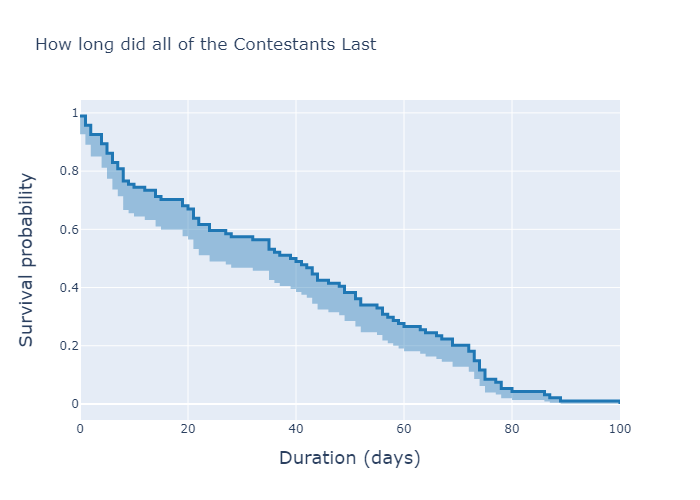

In [167]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [168]:
model_df= pd.DataFrame(columns=["season","model"])
for season in df["season"].unique():
    grouped_model = df.loc[df.season == season]
    kmf = KaplanMeierFitter()
    kmf_model = kmf.fit(durations=grouped_model['days_lasted'])
    season_df = pd.DataFrame({"season":season, "model":kmf_model},index=[0])
    model_df = pd.concat ([model_df, season_df], ignore_index= True)

model_df



,season,model
0,1,"<lifelines.KaplanMeierFitter:""KM_estimate"", fi..."
1,2,"<lifelines.KaplanMeierFitter:""KM_estimate"", fi..."
2,3,"<lifelines.KaplanMeierFitter:""KM_estimate"", fi..."
3,4,"<lifelines.KaplanMeierFitter:""KM_estimate"", fi..."
4,5,"<lifelines.KaplanMeierFitter:""KM_estimate"", fi..."
5,6,"<lifelines.KaplanMeierFitter:""KM_estimate"", fi..."
6,7,"<lifelines.KaplanMeierFitter:""KM_estimate"", fi..."
7,8,"<lifelines.KaplanMeierFitter:""KM_estimate"", fi..."
8,9,"<lifelines.KaplanMeierFitter:""KM_estimate"", fi..."


In [169]:
from plotly.subplots import make_subplots

# Survival Analysis using Plotly - By Season 

fig = make_subplots(
    rows=3,
    cols=3,
    vertical_spacing=0.10,
    subplot_titles=["Season " + str(x) for x in df.season.unique()],
    y_title= "Survival probability",
    x_title ="Duration (Days)"
)
showlegend = True

n =df.season.nunique()
for i in range(n):
    fig.add_trace(go.Scatter(
        x=model_df[model_df.season==i+1].model[i].survival_function_.index, 
        y=model_df[model_df.season==i+1].model[i].survival_function_['KM_estimate'],
        line=dict(shape='hv', width=3, color='rgb(31, 119, 180)'),
        showlegend=False,
        mode="lines"
    ),
    row = int(i/3)+1,
    col = int(i%3)+1
    )

    fig.add_trace(go.Scatter(
        x=model_df[model_df.season==i+1].model[i].confidence_interval_.index,
        y=model_df[model_df.season==i+1].model[i].confidence_interval_['KM_estimate_lower_0.95'],
        line=dict(shape='hv', width=0),
        fill='tonexty',
        fillcolor='rgba(31, 119, 180, 0.4)',
        showlegend=False,
        mode="lines"
    ),
    row = int(i/3)+1,
    col = int(i%3)+1
    )

fig.update_layout(
    title = "How Long did all of the Contestants Last in Each Season",
   # margin=dict(r=0, t=10, l=0),
   # font_size=14,
    height= 1000,
    width = 1000,
)


fig.show()


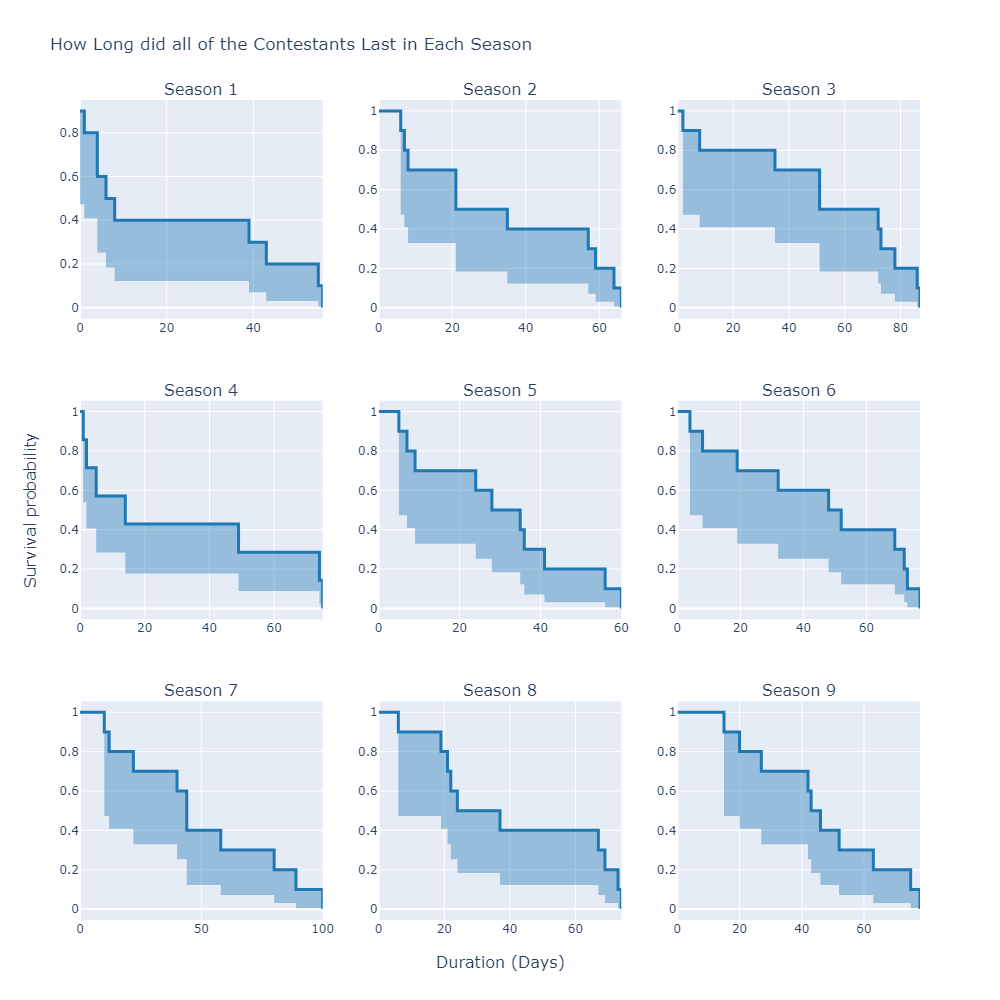

In [170]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)